# Model Training on the Student Performance Dataset:

- **Importing important libraries and reading our dataset**:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for modelling:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor #knn regressor model
from sklearn.tree import DecisionTreeRegressor #DecisionTree regressor model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #RandomForest and AdaBoost Regressor models
from sklearn.svm import SVR #SupportVectorRegressor models
from sklearn.linear_model import LinearRegression, Ridge, Lasso #LinearRegression, RidgeRegression, lassoRegression models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor #catboostregressor models
from xgboost import XGBRegressor
import warnings

In [2]:
#Reading the dataset
df = pd.read_csv('dataset/student.csv')

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
#Preparing our X[training data] and y[prediction data]:
X=df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
#Unique Categories in all the categorical columns:

print(f"Categories in Gender col: {df['gender'].unique()}")
print(f"Categories in Race/Ethnicity col: {df['race_ethnicity'].unique()}")
print(f"Categories in Parental Level of education col: {df['parental_level_of_education'].unique()}")
print(f"Categories in Lunch col: {df['lunch'].unique()}")
print(f"Categories in Test Preparation course col: {df['test_preparation_course'].unique()}")

Categories in Gender col: ['female' 'male']
Categories in Race/Ethnicity col: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of education col: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch col: ['standard' 'free/reduced']
Categories in Test Preparation course col: ['none' 'completed']


In [7]:
#Seperate the Numerical and Categorical features:
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

In [8]:
#Creating 3 types of Column Transformers: OneHotEncoder, Standard Scaler, ColumnTransformer


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
      ("OneHotEncoder", cat_transformer, categorical_features), 
      ("StandardScaler", num_transformer, numerical_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
#Seperate Training and Testing Data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [12]:
#Creating a Model evaluating Function to evaluate the performance of all our models:

def evaluate_models(true, predicted):
    mae = mean_absolute_error(true, predicted)
    #mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [15]:
#Let's setup all our models:

models = {
    'Linear_Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'RandomForest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'SupportVector Regressor': SVR()
}


model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    #training our model
    model.fit(X_train, y_train)

    #make predictions
    y_train_preds = model.predict(X_train)  
    y_test_preds = model.predict(X_test) 


    #Evaluating training and testing dataset:
    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_models(y_train, y_train_preds)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_models(y_test, y_test_preds)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])



    #Performance on the Training Set:
    print("Model performance on the Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2_score))
    
    print('-------------------------------------------------------------------------------------')


    #Performance On the Testing Set:
    print('Model performance on the Testing Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score) 

    print('='*35)
    print('\n')
    

Linear_Regression
Model performance on the Training Set
- Root Mean Squared Error: 5.2579
- Mean Absolute Error: 4.5413
- R2 Score: 0.8810
-------------------------------------------------------------------------------------
Model performance on the Testing Set
- Root Mean Squared Error: 5.6579
- Mean Absolute Error: 4.5413
- R2 Score: 0.8539


Lasso
Model performance on the Training Set
- Root Mean Squared Error: 6.5207
- Mean Absolute Error: 5.4091
- R2 Score: 0.8170
-------------------------------------------------------------------------------------
Model performance on the Testing Set
- Root Mean Squared Error: 6.7188
- Mean Absolute Error: 5.4091
- R2 Score: 0.7940


Ridge
Model performance on the Training Set
- Root Mean Squared Error: 5.2570
- Mean Absolute Error: 4.5345
- R2 Score: 0.8810
-------------------------------------------------------------------------------------
Model performance on the Testing Set
- Root Mean Squared Error: 5.6569
- Mean Absolute Error: 4.5345
- R2

### Compiling Results:

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model_name,R2_score
2,Ridge,0.853955
0,Linear_Regression,0.853904
8,CatBoosting Regressor,0.821130
6,RandomForest Regressor,0.813018
3,K-Neighbors Regressor,0.806787
9,SupportVector Regressor,0.805458
5,AdaBoost Regressor,0.801747
1,Lasso,0.793985
7,XGBoost Regressor,0.759557
4,DecisionTree Regressor,0.724121


### Linear Regression:

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100.0
print('Accuracy of the model is %.2f'%score) 

Accuracy of the model is 85.39


#### Plotting y_pred and y_test:

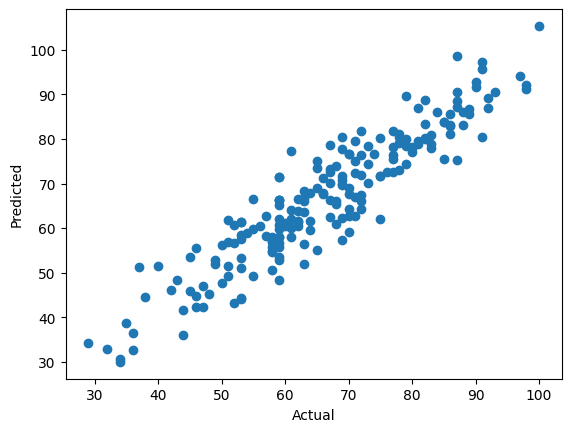

In [18]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

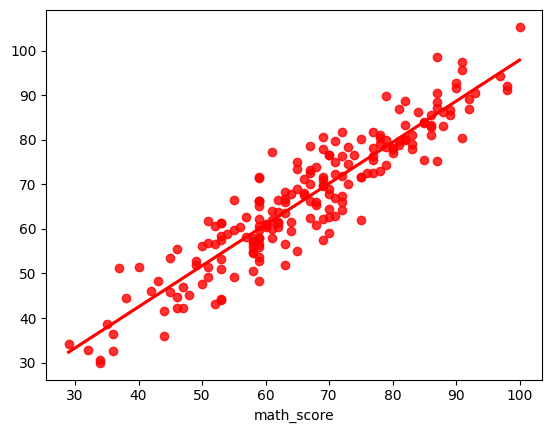

In [19]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference between Actual and Predicted Values:

In [20]:
preds_df = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred, 'Difference':y_test-y_pred})
preds_df

,Actual Values,Predicted Values,Difference
204,59,48.308594,10.691406
71,63,63.511719,-0.511719
594,92,86.843750,5.156250
672,69,69.667969,-0.667969
14,50,47.609375,2.390625
...,...,...,...
647,64,61.511719,2.488281
797,70,76.664062,-6.664062
605,75,71.695312,3.304688
611,58,57.320312,0.679688
